In [117]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# Problem 1: Working with Images

<class 'numpy.ndarray'>
(512, 768, 3)


Text(0.5, 1.0, 'Blue')

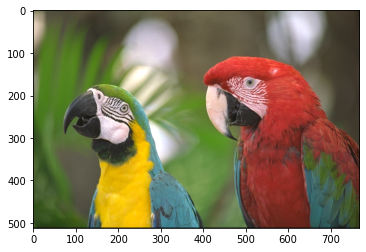

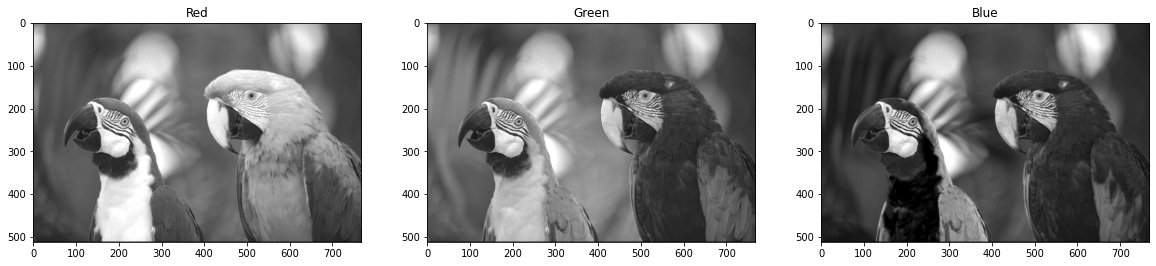

In [118]:
# a) 
# Load an RGB color image and display the RGB image 
## Read image from .jpg file. 
img = cv2.imread('test.png')   # BGR
print(type(img))  # img is a 3-dimensional numpy array
print(img.shape)  # First two dimensions are the image spatial size, last dimension is number of channels
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)   #converts color space from BGR to RGB
plt.figure()
plt.imshow(img_rgb)

## Each color channel R, G, and B separately
img_red = img_rgb[:,:,0]
img_green = img_rgb[:,:,1]
img_blue = img_rgb[:,:,2]
plt.figure(figsize = (20,20))
plt.subplot(1,3,1)
plt.imshow(img_red, cmap = 'gray')     
plt.title('Red')
plt.subplot(1,3,2)
plt.imshow(img_green, cmap = 'gray')
plt.title('Green')
plt.subplot(1,3,3)
plt.imshow(img_blue, cmap = 'gray')
plt.title('Blue')

- The three seperated channels are depicted above.
- We can see that the regions containing red colour in the original image (right bird's head) are lighter in the red channel image. This means that regions which contribute more to the red colour of the original image are lighter in the grayscale image of the red channel. And the regions which contribute less or do not contribute has a darker tone in the greyscale image. This applies for all the three channels.

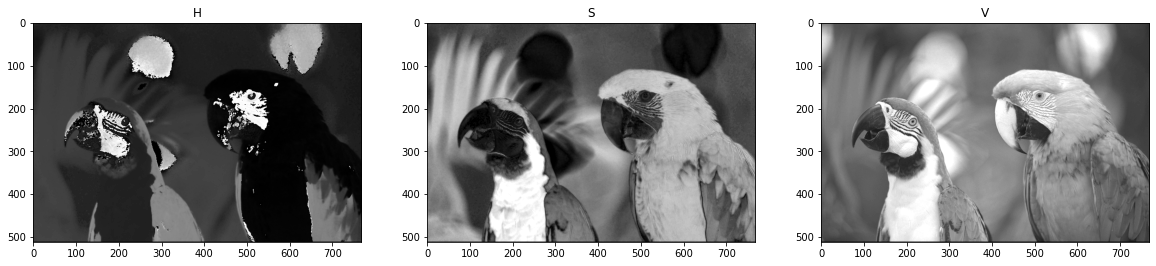

In [119]:
# b) ) Convert the RGB image to the HSV colorspace and display the H, S, and V channels separately

# Convert RGB image to HSV
img_hsv  = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)


# Extract individual channels (H, S, V)
img_hue = img_hsv[:, :, 0]
img_saturation = img_hsv[:, :, 1]
img_value = img_hsv[:, :, 2]

# Display the H, S, and V channels
plt.figure(figsize=(20, 20))
plt.subplot(1, 3, 1)
plt.imshow(img_hue, cmap='gray', vmin=0, vmax=179)  # Hue values range from 0 to 179
plt.title('H')
plt.subplot(1, 3, 2)
plt.imshow(img_saturation, cmap='gray', vmin=0, vmax=255)  # Saturation values range from 0 to 255
plt.title('S')
plt.subplot(1, 3, 3)
plt.imshow(img_value, cmap='gray', vmin=0, vmax=255)  # Value (brightness) values range from 0 to 255
plt.title('V')

plt.show()

- The three seperated channels are depicted above. 
- The Hue channel provides information about the dominant colors in the image. Each hue corresponds to a specific color on the color wheel. The above depicts a differences in the Hue channel, indicating variations in color. 
- The Saturation channel reflects the intensity or vividness of colors. In the above saturation channel we can see that the highly colorful regions like birds'coat is shown in lighter color while less colorful region are shown in darker color.
- Differences in the Value channel highlight variations in brightness of the image. Value channel shows well-illuminated picture due to its bright regions throughout the channel. 

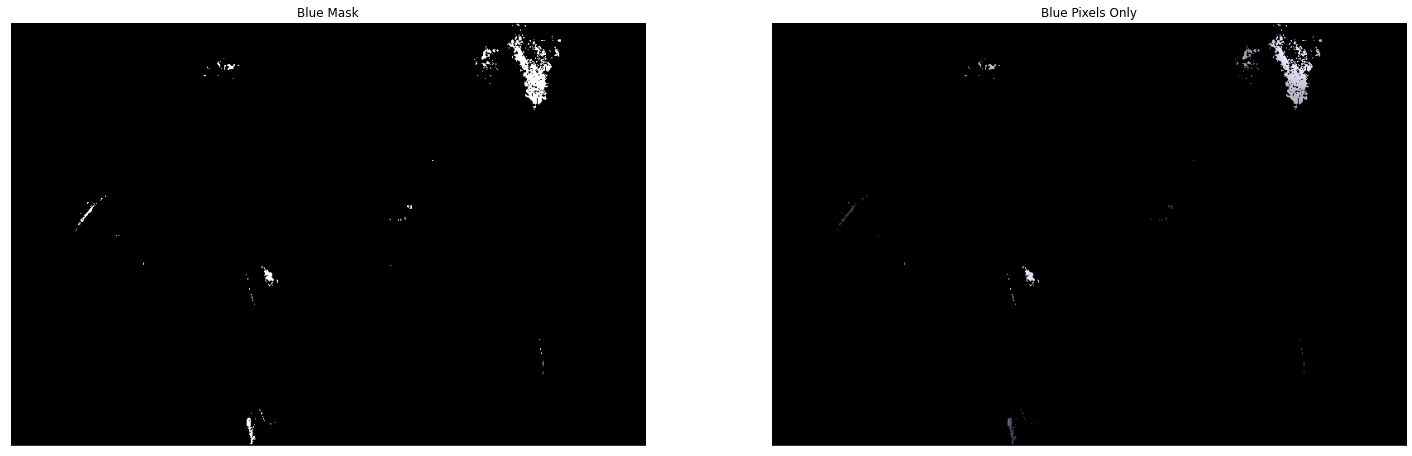

In [125]:
# c)# Define the range for blue hues (110 to 130)
# Create a binary mask for blue pixels
blue_mask = cv2.inRange(img_hsv, np.array([110,20,20]), np.array([130,255,255]))

# Create an output image with blue pixels displayed, others as black
output_img = cv2.bitwise_and(img_rgb, img_rgb, mask=blue_mask)

# Display the blue pixels in the original image
fig = plt.figure(figsize=(25, 25))
ax1 = plt.subplot(2,2,1)
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
plt.imshow(blue_mask,cmap=plt.cm.gray)
plt.title('Blue Mask')
ax2 = plt.subplot(2,2,2)
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)
plt.imshow(output_img,cmap=plt.cm.gray)
plt.title('Blue Pixels Only')
plt.show()


- Given Hue (H) range: 110-130. Given this range and the image, I use Saturation (S) of 10 to 255 and Value (V) of 10 to 255 to create a mask that captures a wide range of blue colors (In terms of how intense and bright the color should be). I decided to go with these value upon testing other ranges (S from 50 to 255 and V from 50 to 255,...) and observing very small number of masked pixels
- The birds in the original image have blue areas on their coat, however it's undetected under the range given by the question despite changes to the saturation and value range. 
- Conjecture: The blue shown in the original image falls out of the given Hue range. I'll attempt to find the right range in the section below.

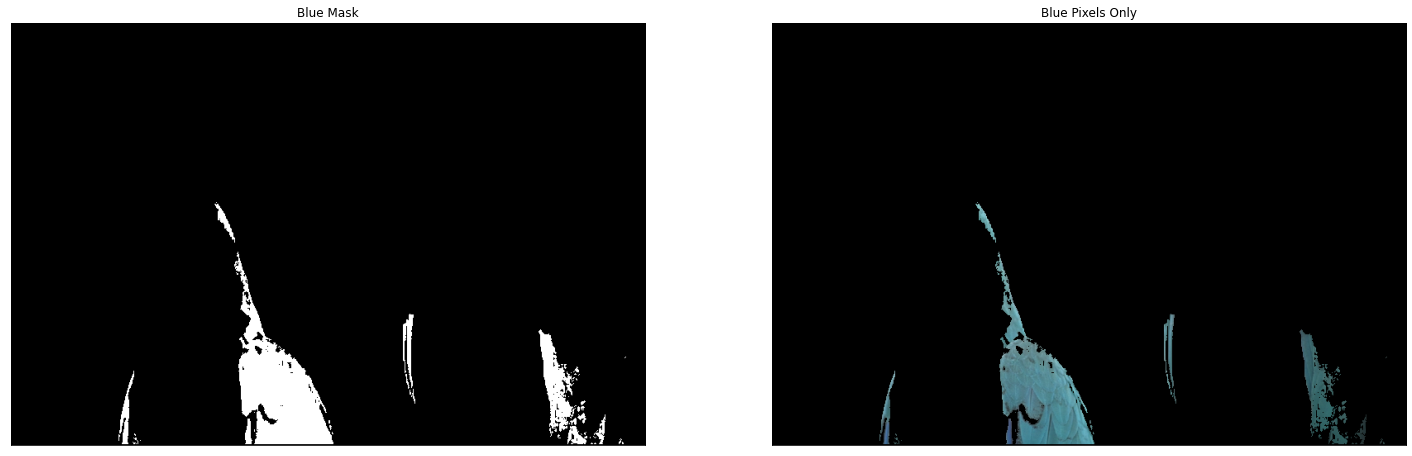

In [126]:
# c)# Define the range for blue hues (110 to 130)
# Create a binary mask for blue pixels
blue_mask = cv2.inRange(img_hsv, np.array([90,50,50]), np.array([130,255,255]))

# Create an output image with blue pixels displayed, others as black
output_img = cv2.bitwise_and(img_rgb, img_rgb, mask=blue_mask)

# Display the blue pixels in the original image
fig = plt.figure(figsize=(25, 25))
ax1 = plt.subplot(2,2,1)
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
plt.imshow(blue_mask,cmap=plt.cm.gray)
plt.title('Blue Mask')
ax2 = plt.subplot(2,2,2)
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)
plt.imshow(output_img,cmap=plt.cm.gray)
plt.title('Blue Pixels Only')
plt.show()


- I adjusted the Hue of 90 to 130, Saturation of 50 to 255 and Value of 50 to 255 to achieve the above results
- The blue details on the birds are masked as shown. Most of the blue details on the coat are masked with the HSV value provided above

# Problem 2: Contrast Enhancement.

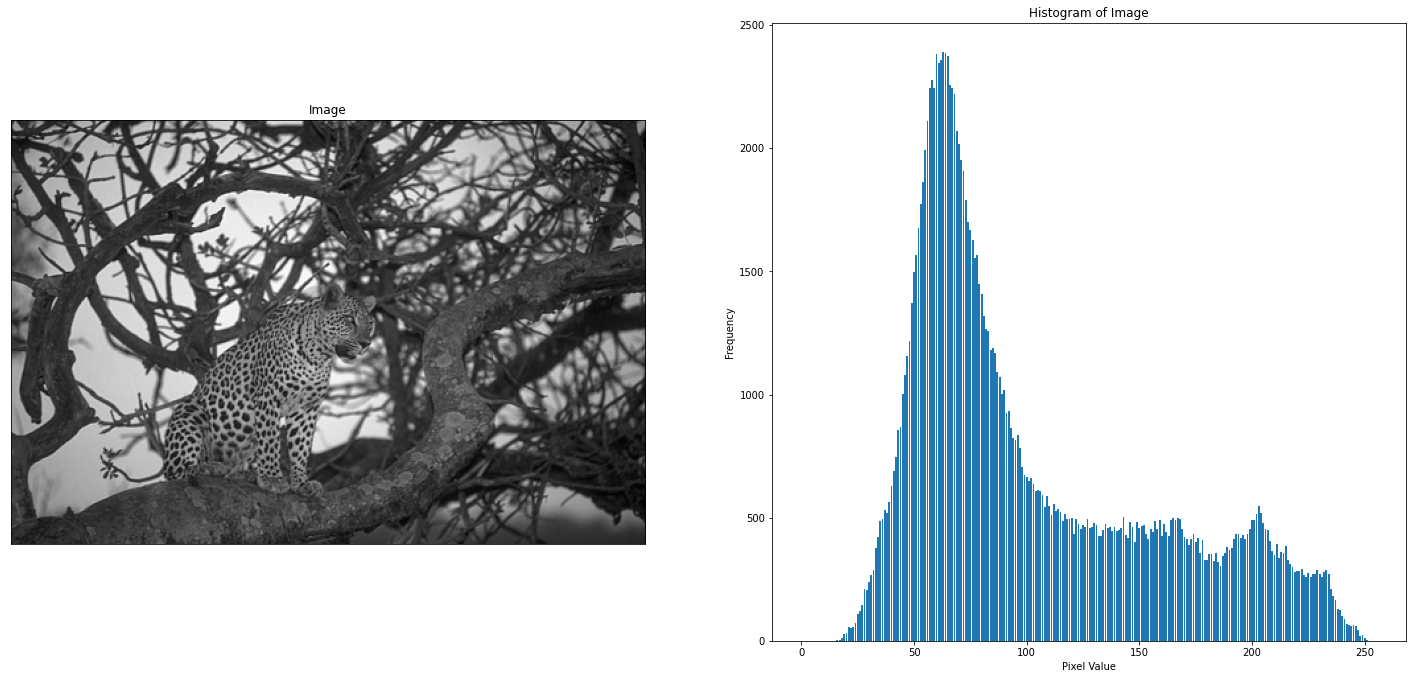

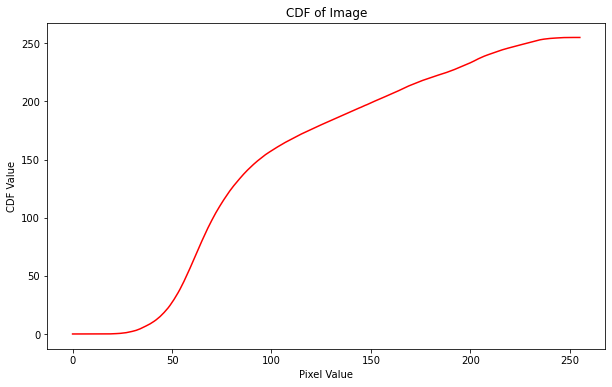

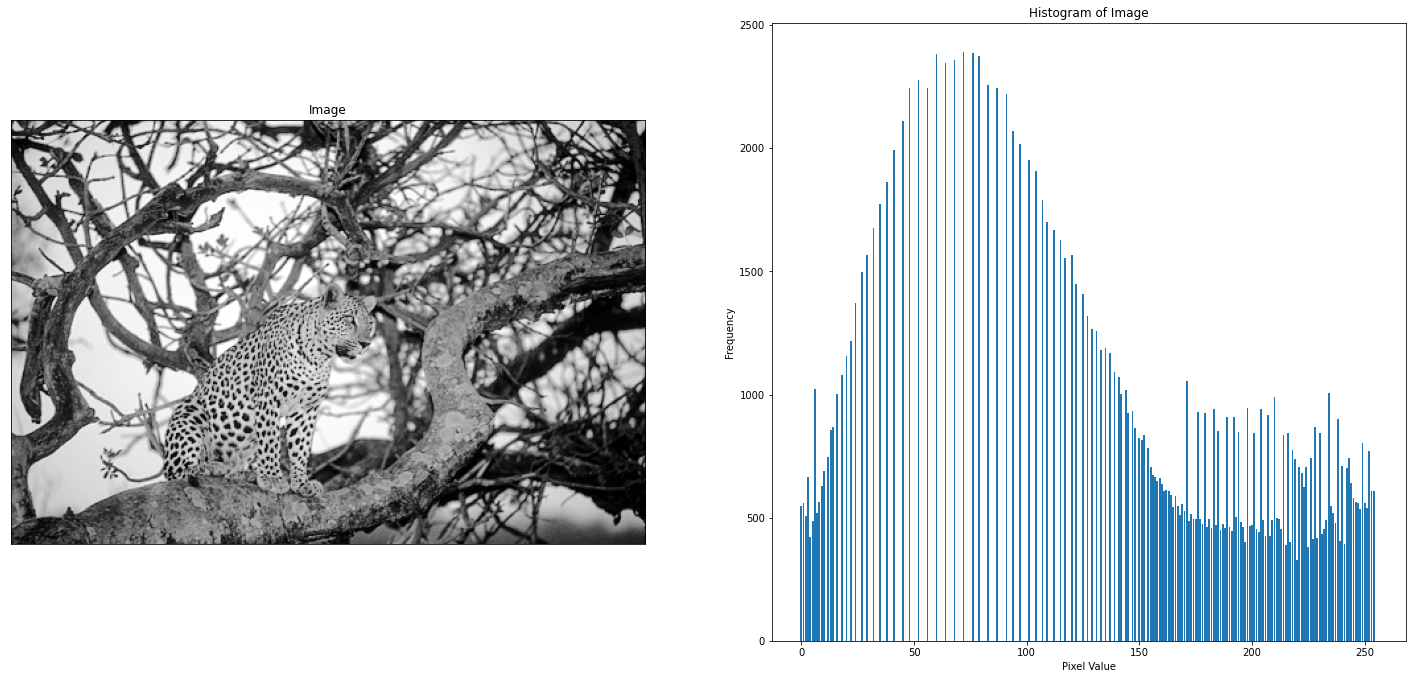

In [127]:
def cdf_to_img(hist, img):
    cdf = hist.cumsum()
    cdf_normalized = cdf * 255/ cdf[-1]
    #plot the cdf of image 
    plt.figure(figsize=(10,6))

    plt.plot(cdf_normalized, color='r')
    plt.title('CDF of Image')
    plt.xlabel('Pixel Value')
    plt.ylabel('CDF Value')
    # Replace the vales with normalized cdf values
    img_histeq = cdf_normalized[img]
    return img_histeq

def histogram_generator(img):
    img1 = img.astype(np.float64)
    h = np.zeros(256)
    # Get the dimensions of the image
    M, N = img1.shape

    # Iterate over each pixel in the image and update the histogram
    for i in range(M):
        for j in range(N):
            f = img1[i, j]
            h[int(f)] += 1

    # Display the image and its histogram
    fig = plt.figure(figsize=(25, 25))
    ax1 = plt.subplot(2,2,1)
    ax1.get_xaxis().set_visible(False)
    ax1.get_yaxis().set_visible(False)
    plt.imshow(img,cmap=plt.cm.gray)
    plt.title('Image')
    ax2 = plt.subplot(2,2,2)
    # ax2.get_xaxis().set_visible(False)
    # ax2.get_yaxis().set_visible(False)
    plt.bar(range(256), h)
    plt.title('Histogram of Image')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.show()

    return h

img = cv2.imread('low_contrast_image.png', 0) 
histo = histogram_generator(img)
img_histeq = cdf_to_img(histo,img)
histo2 = histogram_generator(img_histeq)


a)  Comment on the relation between the image's contrast and its histogram: 
- The orginal image is a low contrast image with low brightness. 
- The histogram skewes a little bit off the center to the left, has unbalanced distribution with majority of low pixel values (the histogram is not flat and spread out). This histogram represents an image with low contrast and brightness


b) 
- Is CDF an appropriate equalization function for this case? Yes, from the CDF graph of my histogram we can see that it compresses low values and boosts high values, which will spread out the distribution of the histogram and increase the contrast of the original image (a low contrast, low brightness image)
c) 
- The resulted histogram is not 100% flat out, but it has the range of 0 to 255 (instead of ~25 to 255), surpressed low values and boosted the high values, making the resulted histogram more flat and spread out compared to the original historgram.
- The transformed image has better contrast and brightness compared to the orginal image. In the transformed image, we can see that the leopard is more visible and distinguishable from the background. The tree and the leopard's coat patterns also received a contrast and brightness boost.  